In [1]:
from matplotlib import pyplot

In [23]:
import os
import pandas
import numpy

def GetJobProfilesWithCompRangesPath():
    return os.getenv('APPDATA') + "\\Microsoft\\Addins\\Reports\\Job Profile With Comp Ranges.csv"

def getLevelIndex(nivel):
    ilevels = ["","","","","P1","P2","P3","P4","P5","P6"]
    mlevels = ["","","","","","M1","M2","M3","M4","M5","M6"]   

    if nivel in ilevels:
        this_index = ilevels.index(nivel)
    elif nivel in mlevels:
        this_index = mlevels.index(nivel)
    elif nivel in islevels:
        this_index = islevels.index(nivel)
    elif nivel in slevels:
        this_index = slevels.index(nivel)
    return this_index


def GetTypicalProgression(CompMarket,from_level,to_level):
    
    indiceFrom = getLevelIndex(from_level)
    indiceTo = getLevelIndex(to_level)
    
    tempVar = ""
    
    if (indiceFrom > indiceTo) or (indiceFrom == indiceTo and (from_level[0] == "M" or from_level[0]=="E")):
        tempVar = to_level
        to_level = from_level
        from_level = tempVar
    print(CompMarket,from_level,to_level)
    dfJobProfilesWithCompRanges = pandas.read_csv(GetJobProfilesWithCompRangesPath())

    # removing shells
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges['Pay Range Midpoint']!=0]
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges['Pay Range Midpoint']!="0"]
    
    # removing inactive jobs
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges["Job Profile"].str.contains("inactive")==False]
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges["Job Profile"].str.contains("zDNU")==False]

    # Filter for comp market
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges["Compensation Market"]==CompMarket]

    # drop duplicates on Compensation Grade Profiles
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges.drop_duplicates(subset=["Compensation Grade"])
    if len(dfJobProfilesWithCompRanges)==0:
        return ("","","","","")
    
    dfJobProfilesWithCompRanges["Comp Grade Family"] = dfJobProfilesWithCompRanges["Compensation Grade"].str.split('-',expand=True)[0]
    dfJobProfilesWithCompRanges = dfJobProfilesWithCompRanges[["Comp Grade Family","Management Level", 'Pay Range Midpoint']]

    # To level table
    dfToLevel = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges['Management Level']==to_level]

    # from level table
    dfFromLevel = dfJobProfilesWithCompRanges[dfJobProfilesWithCompRanges['Management Level']==from_level]

    dfFromLevel = dfFromLevel.merge(dfToLevel, on="Comp Grade Family", how="inner",suffixes=("-Lower","-Higher"))
    dfFromLevel["Pay Range Midpoint-Higher"] = pandas.to_numeric(dfFromLevel["Pay Range Midpoint-Higher"])
    dfFromLevel["Pay Range Midpoint-Lower"] = pandas.to_numeric(dfFromLevel["Pay Range Midpoint-Lower"])
    dfFromLevel = dfFromLevel.dropna(subset=["Pay Range Midpoint-Higher","Pay Range Midpoint-Lower"])
    dfFromLevel = dfFromLevel[dfFromLevel["Pay Range Midpoint-Higher"]!=0]
    dfFromLevel = dfFromLevel[dfFromLevel["Pay Range Midpoint-Lower"]!=0]
    dfFromLevel["Progression"] = dfFromLevel["Pay Range Midpoint-Higher"]/dfFromLevel["Pay Range Midpoint-Lower"]-1
    
    pyplot.hist(dfFromLevel["Progression"])
    pyplot.show()
    
    if len(dfFromLevel)==0:
        return ("","","","","")

    else:
        tupleResponse= (
            numpy.percentile(dfFromLevel["Progression"],1),
            numpy.percentile(dfFromLevel["Progression"],25),
            numpy.percentile(dfFromLevel["Progression"],50),
            numpy.percentile(dfFromLevel["Progression"],75),
            numpy.percentile(dfFromLevel["Progression"],100),
            dfFromLevel["Progression"].mean(),
            dfFromLevel["Progression"].count()
            )

    return tupleResponse


dfJobProfilesWithCompRanges = pandas.read_csv(GetJobProfilesWithCompRangesPath())
zones = []
Level1 = []
Level2 = []

compmarkets = ["LOC005"]
#for zone in dfJobProfilesWithCompRanges["Compensation Market"].unique():
for zone in compmarkets:
    for a in range(len(FromLevel)):
        zones.append(zone)
        Level1.append(FromLevel[a])
        Level2.append(ToLevel[a])

LOC003 P6 M5


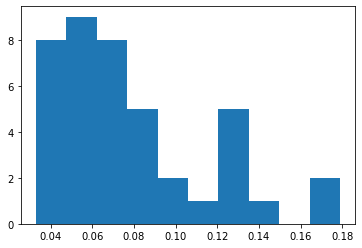

LOC003 P7 M6


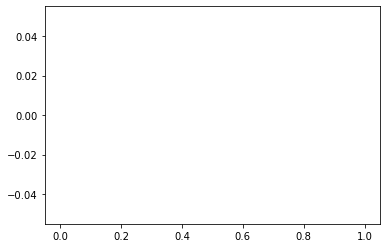

LOC002 P6 M5


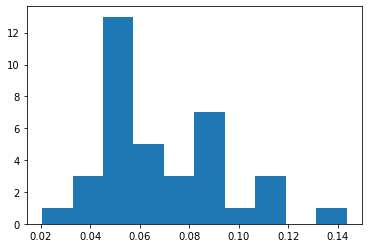

LOC002 P7 M6


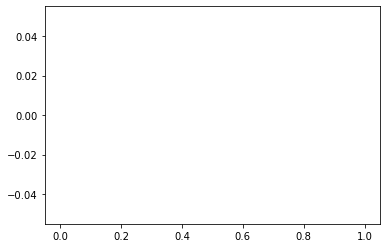

LOC004 P6 M5


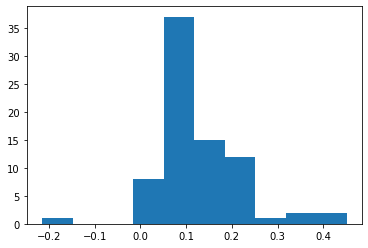

LOC004 P7 M6


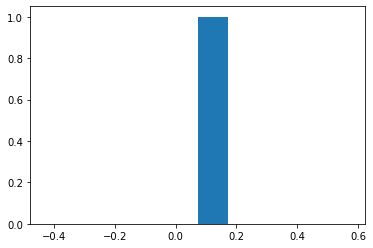

LOC006 P6 M5


LOC006 P7 M6


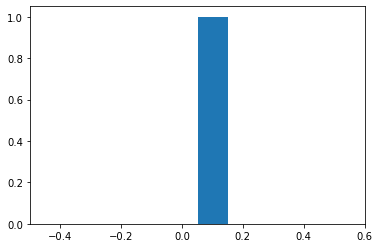

LOC001 P6 M5


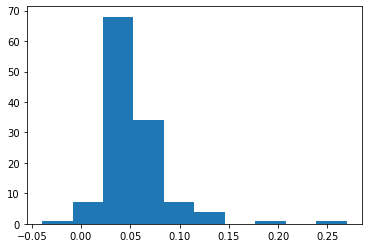

LOC001 P7 M6


In [28]:
compmarkets = ["LOC003","LOC002", "LOC004", "LOC006", "LOC001"]
#for zone in dfJobProfilesWithCompRanges["Compensation Market"].unique():
for zone in compmarkets:
    for a in range(len(FromLevel)):
        GetTypicalProgression(zone,FromLevel[a],ToLevel[a])